In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
import numpy as np
from scipy.stats import shapiro

### Assumption 1: You have one dependent variable that is measured at the continuous level.
The dependent variable is Mischief which is continuous

### Assumption 2: You have one independent variable that consists of two categorical, independent groups (i.e., a dichotomous variable).
The independent variable is Cloak and consists of two categorical independent groups, that is, participant with a cloak and participant without a cloak.

### Assumption 3: You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.
There is no relation between the observations as the participants are only present to their own specific group.


In [43]:
data = pd.read_csv(r"C:\Users\Julian Quijano\Desktop\Invisibility Cloak.csv")

print(data)

cloak = data[data["Cloak"] == 1]

no_cloak = data[data["Cloak"] == 0]

    Participant  Cloak  Mischief
0             1      0         3
1             2      0         1
2             3      0         5
3             4      0         4
4             5      0         6
5             6      0         4
6             7      0         6
7             8      0         2
8             9      0         0
9            10      0         5
10           11      0         4
11           12      0         5
12           13      1         4
13           14      1         3
14           15      1         6
15           16      1         6
16           17      1         8
17           18      1         5
18           19      1         5
19           20      1         4
20           21      1         2
21           22      1         5
22           23      1         7
23           24      1         5


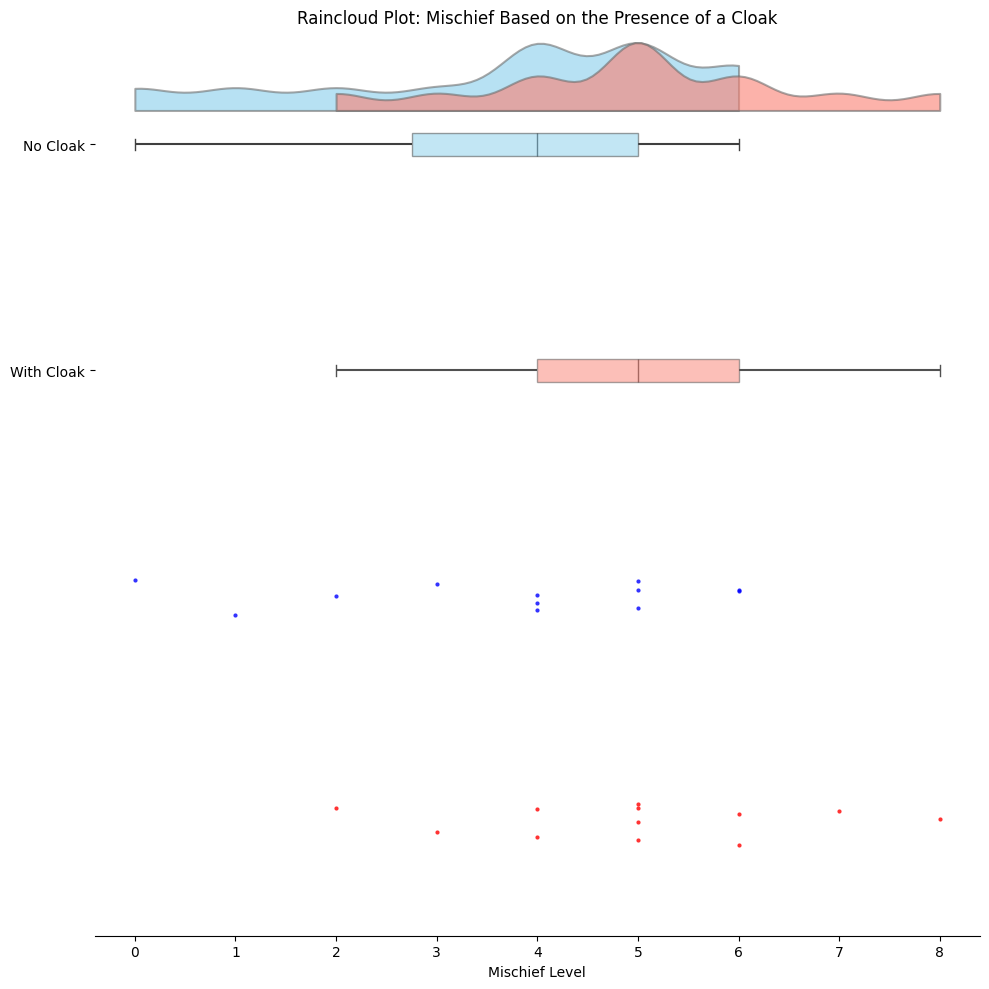

In [47]:
y_positions = {0: 0, 1: 1.5}
violin_offset = 0.1
box_offset = 0
scatter_offset = -0.1

# Half-violin plots
plt.figure(figsize=(10, 10))
ax = plt.gca()
pt.half_violinplot(
    y=[y_positions[0] + violin_offset] * len(data[data["Cloak"] == 0]),
    x=data[data["Cloak"] == 0]["Mischief"],
    bw=.2, cut=0., scale="area", width=.6,
    inner=None, color="skyblue", alpha=0.6,
    orient="h", ax=ax
)
pt.half_violinplot(
    y=[y_positions[1] + violin_offset] * len(data[data["Cloak"] == 1]),
    x=data[data["Cloak"] == 1]["Mischief"],
    bw=.2, cut=0., scale="area", width=.6,
    inner=None, color="salmon", alpha=0.6,
    orient="h", ax=ax
)

# Box Plots
sns.boxplot(
    data=data[data["Cloak"] == 0],
    x="Mischief", y=[y_positions[0] + box_offset] * len(data[data["Cloak"] == 0]),
    orient="h", width=0.1,
    showcaps=True, showfliers=False,
    boxprops={'facecolor': 'skyblue', 'alpha': 0.5, 'zorder': 3},
    whiskerprops={'linewidth': 1.5},
    ax=ax
)
sns.boxplot(
    data=data[data["Cloak"] == 1],
    x="Mischief", y=[y_positions[1] + box_offset] * len(data[data["Cloak"] == 1]),
    orient="h", width=0.1,
    showcaps=True, showfliers=False,
    boxprops={'facecolor': 'salmon', 'alpha': 0.5, 'zorder': 3},
    whiskerprops={'linewidth': 1.5},
    ax=ax
)

# Scatter Plots
sns.stripplot(
    data=data[data["Cloak"] == 0],
    x="Mischief", y=[y_positions[0] + scatter_offset] * len(data[data["Cloak"] == 0]),
    orient="h", color="blue", size=3,
    jitter=0.1, alpha=0.8, zorder=4, ax=ax
)
sns.stripplot(
    data=data[data["Cloak"] == 1],
    x="Mischief", y=[y_positions[1] + scatter_offset] * len(data[data["Cloak"] == 1]),
    orient="h", color="red", size=3,
    jitter=0.1, alpha=0.8, zorder=4, ax=ax
)

ax.set_yticks([0, 1])
ax.set_yticklabels(["No Cloak", "With Cloak"])
ax.set_xlabel("Mischief Level")
ax.set_title("Raincloud Plot: Mischief Based on the Presence of a Cloak")
ax.set_ylim(max(y_positions.values()) + 2, -0.5)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

### Assumption 4: There should be no significant outliers in the two groups of your independent variable in terms of the dependent variable.
By visual assessment of the raincloud plot above, there no significant outliers in both groups of independent variables.

### Assumption 5: Your dependent variable should be approximately normally distributed for each group of the independent variable.
By Shapiro-Wilks Test, the dependent variable is normally distributed for each group since both p-values are > 0.05.

In [42]:
cloak_shapiro = shapiro(cloak["Mischief"])
no_cloak_shapiro = shapiro(no_cloak["Mischief"])

result_table = pd.DataFrame(index=['Cloak', 'No Cloak'],
                            data=
                            {
    'Statistic': [cloak_shapiro.statistic, no_cloak_shapiro.statistic],
    'P-Value': [cloak_shapiro.pvalue, no_cloak_shapiro.pvalue],
})
print(result_table)

          Statistic   P-Value
Cloak      0.972617  0.936188
No Cloak   0.912764  0.231446


## Null Hypothesis
$$
H_0 : \mu_1 = \mu_2
$$

There is no significant difference between the two independent variables Cloak and No Cloak regarding Mischief levels. Additionally, given the results of the Shapiro-Wilks Test above, we fail to reject the null hypothesis.